In [1]:
!pip -q install qiskit
!pip -q install qiskit-aer
!pip -q install qiskit-ibm-runtime
!pip -q install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
!pip show qiskit

Name: qiskit
Version: 1.3.0
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime


In [3]:
!pip show qiskit-ibm-runtime

Name: qiskit-ibm-runtime
Version: 0.33.2
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: https://github.com/Qiskit/qiskit-ibm-runtime
Author: Qiskit Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ibm-platform-services, numpy, pydantic, python-dateutil, qiskit, requests, requests-ntlm, urllib3, websocket-client
Required-by: 


### Coding with Qiskit 1

Before solving this notebook, make sure you have `Qiskit > 1.0` or higher and `Qiskit-ibm-runtime > 0.28` or higher installed. You must use `EstimatorV2` for your solution.

#### Creating the quantum circuit

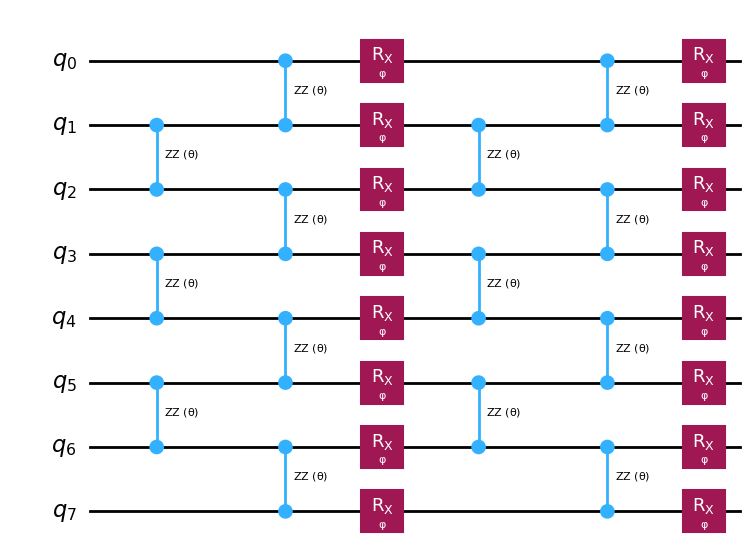

In [4]:
from qiskit.circuit import QuantumCircuit, Parameter

theta = Parameter('θ')
phi = Parameter('φ')
num_qubits = 8
num_steps = 2

qc = QuantumCircuit(num_qubits)
for _ in range(num_steps):
    for i in range(1, num_qubits-1, 2):
        qc.rzz(theta, i, i+1)
    for i in range(0, num_qubits, 2):
        qc.rzz(theta, i, i+1)
    for i in range(num_qubits):
        qc.rx(phi, i)

qc.draw('mpl', fold=-1)

The goal of this exercise will be to calculate the ideal and noisy expectation values of the specified observables for a range of parameter values. In particular, both $\theta$ and $\phi$ will be varied between $0$ and $\pi$ in 5 equal intervals.

#### Q1. Generate parameters

In this step you need to generate 5 equal interval values between $[0,\pi]$ for each of $\theta$ and $\phi$. Create a copy of the circuit, assign a parameter of your choice, and draw the circuit.

In [5]:
### Your solution here
import numpy as np

params = np.vstack(
    [
        np.linspace(0, np.pi, 5, endpoint=True),
        np.linspace(0, np.pi, 5, endpoint=True),
    ]
).T

params

array([[0.        , 0.        ],
       [0.78539816, 0.78539816],
       [1.57079633, 1.57079633],
       [2.35619449, 2.35619449],
       [3.14159265, 3.14159265]])

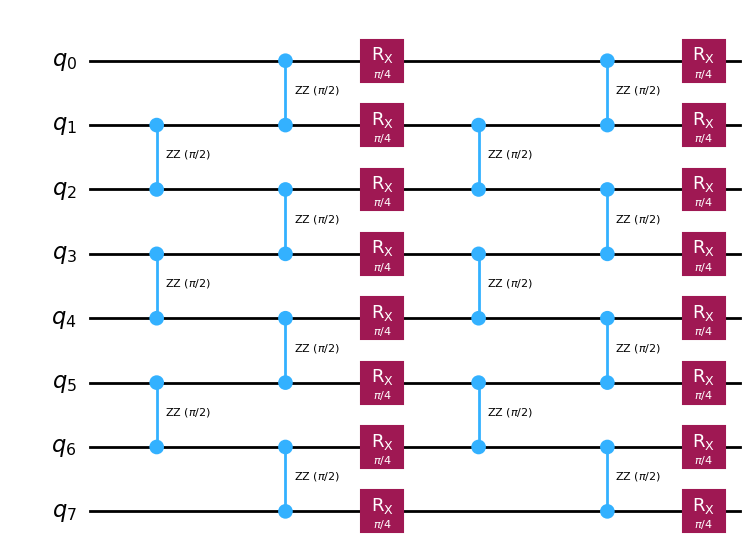

In [6]:
qc_1 = qc.copy()
qc_1.assign_parameters({theta: params[2][0], phi: params[1][1]}, inplace=True)
qc_1.draw('mpl', fold=-1)

#### Q2. Transpile the circuit

In this step you will consider `FakeKolkataV2` as your `backend`.

- Transpile the circuit on this backend.
- Print the different gates and their counts in the transpiled circuit.
- Print the layout (i.e., the physical qubits on which the circuit is placed) of the transpiled circuit.

In [7]:
### Your solution here
from qiskit_ibm_runtime.fake_provider import FakeKolkataV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backend = FakeKolkataV2()
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
transpiled_circuit = pm.run(qc)

In [8]:
print(transpiled_circuit.count_ops())

OrderedDict([('rz', 62), ('sx', 32), ('cx', 28)])


In [9]:
layout = transpiled_circuit.layout
print(layout)

TranspileLayout(initial_layout=Layout({
25: Qubit(QuantumRegister(8, 'q'), 1),
24: Qubit(QuantumRegister(8, 'q'), 2),
26: Qubit(QuantumRegister(8, 'q'), 0),
23: Qubit(QuantumRegister(8, 'q'), 3),
21: Qubit(QuantumRegister(8, 'q'), 4),
18: Qubit(QuantumRegister(8, 'q'), 5),
15: Qubit(QuantumRegister(8, 'q'), 6),
12: Qubit(QuantumRegister(8, 'q'), 7),
0: Qubit(QuantumRegister(19, 'ancilla'), 0),
1: Qubit(QuantumRegister(19, 'ancilla'), 1),
2: Qubit(QuantumRegister(19, 'ancilla'), 2),
3: Qubit(QuantumRegister(19, 'ancilla'), 3),
4: Qubit(QuantumRegister(19, 'ancilla'), 4),
5: Qubit(QuantumRegister(19, 'ancilla'), 5),
6: Qubit(QuantumRegister(19, 'ancilla'), 6),
7: Qubit(QuantumRegister(19, 'ancilla'), 7),
8: Qubit(QuantumRegister(19, 'ancilla'), 8),
9: Qubit(QuantumRegister(19, 'ancilla'), 9),
10: Qubit(QuantumRegister(19, 'ancilla'), 10),
11: Qubit(QuantumRegister(19, 'ancilla'), 11),
13: Qubit(QuantumRegister(19, 'ancilla'), 12),
14: Qubit(QuantumRegister(19, 'ancilla'), 13),
16: Qubit(

#### Q3. Construct observable

In this step you will

- Construct the following observable: $\sum_{i=1}^{N}\langle Z_i \rangle / N$ where $N$ is the number of qubits.
- Apply the layout of the transpiled circuit to this observable. Print the observable after applying layout.

In [10]:
num_qubits = qc.num_qubits
num_qubits

8

In [33]:
### Your solution here
from qiskit.quantum_info import SparsePauliOp

num_qubits = qc.num_qubits

observable = SparsePauliOp.from_sparse_list([('Z', [i], 1) for i in range(num_qubits)], num_qubits=num_qubits)
observable

SparsePauliOp(['IIIIIIIZ', 'IIIIIIZI', 'IIIIIZII', 'IIIIZIII', 'IIIZIIII', 'IIZIIIII', 'IZIIIIII', 'ZIIIIIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])

In [34]:
hamiltonian = observable.apply_layout(layout=layout)
hamiltonian

SparsePauliOp(['ZIIIIIIIIIIIIIIIIIIIIIIIIII', 'IZIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIZIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIZIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZIIIIIIIIIIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])

#### Q4. Prepare for execution

In this step you will create

- Primitive Unified Bloc (PUB) for each possible parameter combination (i.e., there will be $5\times5 = 25$ possible parameter combinations).

In [13]:
vtheta = np.linspace(0, np.pi, 5, endpoint=True)
vphi = np.linspace(0, np.pi, 5, endpoint=True)

params = np.array([[t, p] for t in vtheta for p in vphi])

params

array([[0.        , 0.        ],
       [0.        , 0.78539816],
       [0.        , 1.57079633],
       [0.        , 2.35619449],
       [0.        , 3.14159265],
       [0.78539816, 0.        ],
       [0.78539816, 0.78539816],
       [0.78539816, 1.57079633],
       [0.78539816, 2.35619449],
       [0.78539816, 3.14159265],
       [1.57079633, 0.        ],
       [1.57079633, 0.78539816],
       [1.57079633, 1.57079633],
       [1.57079633, 2.35619449],
       [1.57079633, 3.14159265],
       [2.35619449, 0.        ],
       [2.35619449, 0.78539816],
       [2.35619449, 1.57079633],
       [2.35619449, 2.35619449],
       [2.35619449, 3.14159265],
       [3.14159265, 0.        ],
       [3.14159265, 0.78539816],
       [3.14159265, 1.57079633],
       [3.14159265, 2.35619449],
       [3.14159265, 3.14159265]])

In [44]:
### Your solution here
pubs = []

for t in vtheta:
  for p in vphi:
    pubs.append((transpiled_circuit, hamiltonian, [[t, p]]))

In [45]:
pubs[0]

(<qiskit.circuit.quantumcircuit.QuantumCircuit at 0x7ebcccfc3c10>,
 SparsePauliOp(['ZIIIIIIIIIIIIIIIIIIIIIIIIII', 'IZIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIZIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIZIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZIIIIIIIIIIII'],
               coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]),
 [[0.0, 0.0]])

#### Q5. Noiseless execution

In this step you will

- Construct a `StatevectorEstimator`
- Execute all the PUBs as a **single job**
- Obtain the expectation value for each parameter combination; store the result

In [ ]:
### Your solution here
from qiskit.primitives import StatevectorEstimator

noiseless_results = []
estimator = StatevectorEstimator()

for i in range(len(pubs)):

  pub = pubs[i]
  job = estimator.run([pub])
  noiseless_results.append(job.result())

#### Q6. Noisy execution

In this step you will

- Construct an `EstimatorV2` object with `FakeKolkataV2` as the backend
- Execute all the PUBs as a **single job**
- Obtain the expectation value for each parameter combination
- In a single plot where X-axis is $\theta$ and Y-axis is $\Phi$, plot the outcomes of the noisy and noiseless expectation values

In [46]:
### Your solution here
from qiskit_ibm_runtime import EstimatorV2

noisy_results = []
estimator = EstimatorV2(mode=backend)

for i in range(len(pubs)):

  pub = pubs[i]
  job = estimator.run([pub])
  noisy_results.append(job.result())

In [48]:
noisy_results[0][0].data.evs

array([7.68945312])

In [37]:
noisy_result[0].data.evs

array([ 7.70019531,  0.125     , -7.47216797, -0.02490234,  7.515625  ,
        7.72607422,  2.51806641, -4.19189453,  2.34423828,  7.51904297,
        7.70849609,  5.21972656, -0.06005859,  5.09277344,  7.51123047,
        7.71386719,  3.81103516, -1.39550781,  3.78662109,  7.52294922,
        7.72070312,  2.08105469, -3.66162109,  1.92578125,  7.53466797])

#### Q7. Building towards error mitigation

In this step you will create the framework for error mitigation. Obtaining error mitigated results in not possible on a noisy simulator. For this example, we want the following

- Apply Dynamical Decoupling with `XY4` pulse
- Apply Zero Noise Extrapolation with `[1,2,3]` as the noise factors and `exponential` extrapolator
- Turn on Gate Twirling
- Turn off Measurement Twirling
- Turn off Measurement Error Mitigation

Construct an `EstimatorV2` object with the previously stated error mitigation and suppression options.

In [20]:
### Your solution here
estimator2 = EstimatorV2(mode=backend)
options = estimator2.options

options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

options.resilience.zne_mitigation = True
options.resilience.zne.noise_factors = (1, 2, 3)
options.resilience.zne.extrapolator = "exponential"

options.twirling.enable_gates = True
options.twirling.enable_measure = False
options.resilience.measure_mitigation = False

In [21]:
job = estimator2.run([pub])
mitigation_result = job.result()

/usr/local/lib/python3.10/dist-packages/qiskit_ibm_runtime/fake_provider/local_service.py:233: UserWarning: Options {'dynamical_decoupling': {'enable': True, 'sequence_type': 'XY4'}, 'resilience': {'measure_mitigation': False, 'zne_mitigation': True, 'zne': {'noise_factors': (1.0, 2.0, 3.0), 'extrapolator': 'exponential'}}, 'twirling': {'enable_gates': True, 'enable_measure': False}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


In [24]:
mitigation_result[0].data.evs

array([ 7.70996094,  0.12744141, -7.51855469,  0.05175781,  7.5078125 ,
        7.70996094,  2.47802734, -4.17871094,  2.44384766,  7.50683594,
        7.71289062,  5.17724609,  0.08300781,  5.12597656,  7.51123047,
        7.70458984,  3.90917969, -1.38769531,  3.65039062,  7.54394531,
        7.72363281,  1.98193359, -3.65917969,  1.96484375,  7.50634766])

In [ ]:
mitigation_results = []

for i in range(len(pubs)):

  pub = pubs[i]
  job = estimator2.run([pub])
  mitigation_results.append(job.result())